Importacion de librerias

In [3]:
# Librerías generales
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree

Importacion del dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/datos_datacss.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=",", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Mounted at /content/drive
Datos cargados exitosamente!



# Analisis inicial de los datos

In [5]:
print("Distribución de kills por partida:")
print(data['MatchKills'].describe())

Distribución de kills por partida:
count    79157.000000
mean         8.511578
std          6.195079
min          0.000000
25%          3.000000
50%          8.000000
75%         13.000000
max         41.000000
Name: MatchKills, dtype: float64


Visualizacion de la distribución


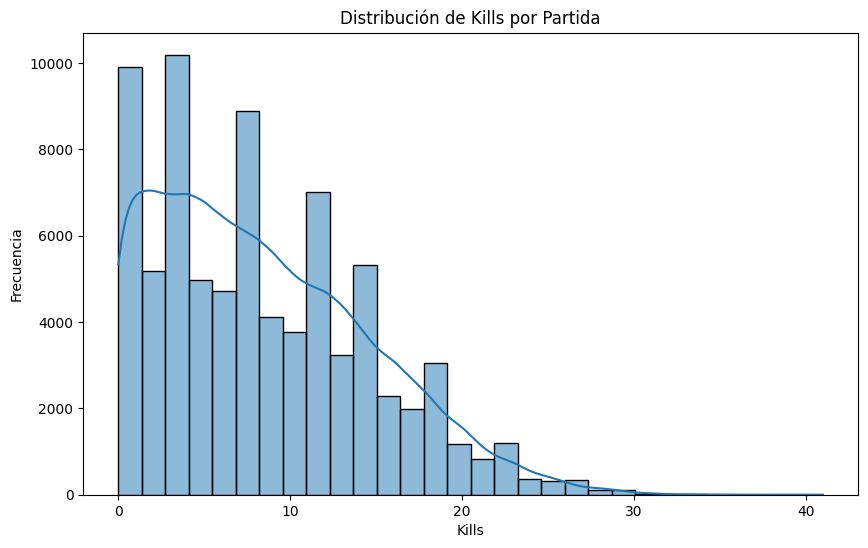

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['MatchKills'], bins=30, kde=True)
plt.title('Distribución de Kills por Partida')
plt.xlabel('Kills')
plt.ylabel('Frecuencia')
plt.show()

Distribucion de las variables

In [10]:
# Variable objetivo
Y = data['MatchKills']

# Variables predictoras
X = data[['Team',
          'RoundStartingEquipmentValue',
          'TeamStartingEquipmentValue',
          'MatchHeadshots',
          'MatchAssists',
          'MatchFlankKills',
          'RLethalGrenadesThrown',
          'Map']]

X = pd.get_dummies(X, drop_first=True)

Distribucion de los tamaños de entrenamiento y prueba

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (55409, 10)
Tamaño del conjunto de prueba: (23748, 10)


Creacion del modelo

In [12]:
# Crear el modelo
reg_tree = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
reg_tree.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=42)

Calcular metricas

In [13]:
# Predecir
Y_pred = reg_tree.predict(X_test)

# Calcular métricas
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


RMSE: 3.52
R²: 0.68


Visualizar el modelo

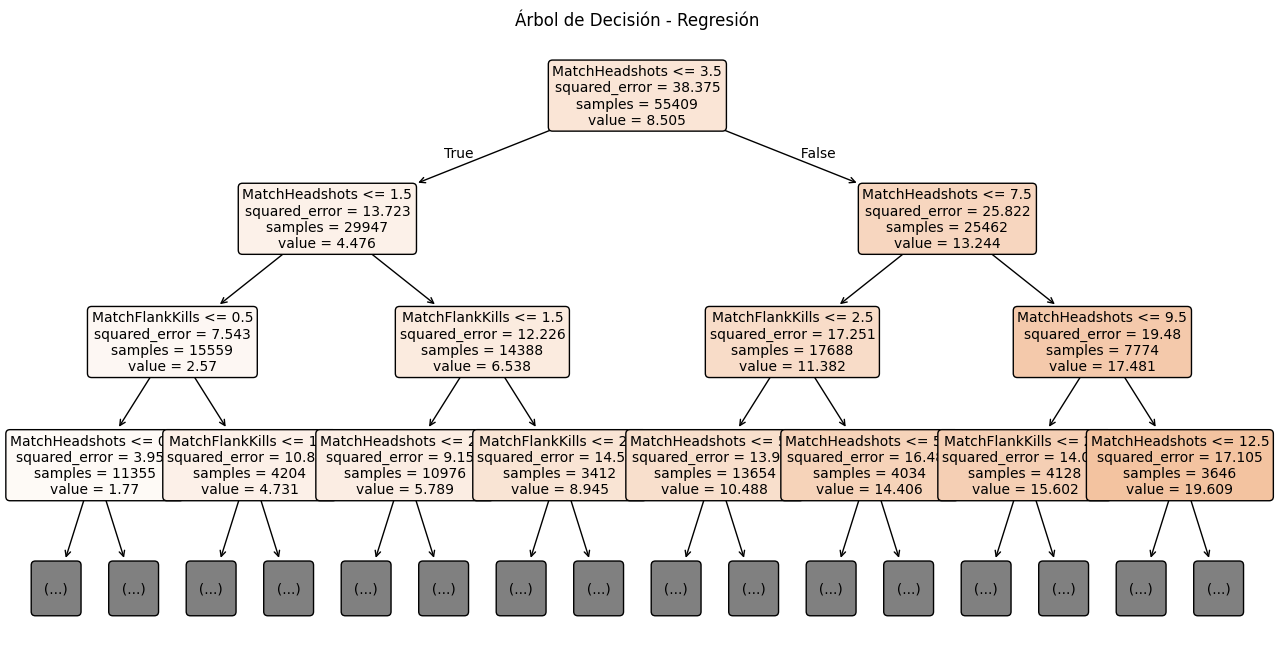

In [14]:
plt.figure(figsize=(16, 8))
plot_tree(
    reg_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,  # Solo los primeros niveles para que se vea más claro
    fontsize=10
)
plt.title('Árbol de Decisión - Regresión')
plt.show()


# Evaluar otros modelos de decision tree

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)

Ocupar mas datos para la evaluacion del modelos como mo2 YHAT y mae

In [16]:
from sklearn.metrics import mean_absolute_error

mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)


#Mean square error(promedio error cuadrados)
mse = mean_squared_error(Ytest, Yhat)
#Mean absoluto error (Cuanto se equivoca)
mae = mean_absolute_error(Ytest, Yhat)
#Coieficiente de determinacion (Cuanto predice bien)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  12.578020958467267
MAE:  2.433429810666705
R^2:  0.6744431376804013


In [17]:
mo2.feature_importances_

array([0.06150033, 0.07694544, 0.69767267, 0.03892516, 0.07939863,
       0.01043486, 0.01060595, 0.00927488, 0.00833662, 0.00690545])

In [18]:
Xtrain.columns

Index(['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchHeadshots', 'MatchAssists', 'MatchFlankKills',
       'RLethalGrenadesThrown', 'Team_Terrorist', 'Map_de_inferno',
       'Map_de_mirage', 'Map_de_nuke'],
      dtype='object')

# SEPARACION


In [19]:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3)

In [20]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3,6),          # [3,4,5]
          "min_samples_split": np.arange(2,5)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])})

In [21]:
# Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(Xtest)

# Calcular métricas
mae = mean_absolute_error(Ytest, y_pred)
mse = mean_squared_error(Ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Ytest, y_pred)

# Mostrar resultados
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


MAE: 2.2788
MSE: 9.2628
RMSE: 3.0435
R2 Score: 0.7636


In [22]:
print(grid.best_score_)
print(grid.best_params_)

0.7594248649026176
{'max_depth': np.int64(5), 'min_samples_split': np.int64(2)}


In [23]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043389,0.001588,0.002823,0.000223,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.700912,0.699123,0.709616,0.698456,0.714112,0.707270,0.705021,0.709846,0.710904,0.711170,0.706643,0.005225,7
1,0.044211,0.003682,0.002707,0.000056,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.700912,0.699123,0.709616,0.698456,0.714112,0.707270,0.705021,0.709846,0.710904,0.711170,0.706643,0.005225,7
2,0.043002,0.001382,0.002799,0.000239,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.700912,0.699123,0.709616,0.698456,0.714112,0.707270,0.705021,0.709846,0.710904,0.711170,0.706643,0.005225,7
3,0.056060,0.002649,0.002897,0.000403,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.734260,0.734817,0.746245,0.737302,0.747502,0.741747,0.741991,0.742254,0.745524,0.746218,0.741786,0.004602,4
4,0.056747,0.004603,0.002865,0.000183,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.734260,0.734817,0.746245,0.737302,0.747502,0.741747,0.741991,0.742254,0.745524,0.746218,0.741786,0.004602,4
5,0.054974,0.001060,0.002764,0.000068,4,4,"{'max_depth': 4, 'min_samples_split': 4}",0.734260,0.734817,0.746245,0.737302,0.747502,0.741747,0.741991,0.742254,0.745524,0.746218,0.741786,0.004602,4
6,0.067672,0.002487,0.003117,0.000572,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.751463,0.751851,0.765839,0.759583,0.762190,0.758596,0.757615,0.762464,0.759932,0.764715,0.759425,0.004594,1
7,0.067468,0.001701,0.002926,0.000234,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.751463,0.751851,0.765839,0.759583,0.762190,0.758596,0.757615,0.762464,0.759932,0.764715,0.759425,0.004594,1
8,0.067500,0.004516,0.002832,0.000107,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.751463,0.751851,0.765839,0.759583,0.762190,0.758596,0.757615,0.762464,0.759932,0.764715,0.759425,0.004594,1


# Escogiendo mejor modelo

In [24]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='r2')

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.7594248649026176
{'max_depth': np.int64(5), 'min_samples_split': np.int64(2)}


In [26]:
#pd.DataFrame(grid.cv_results_).head()
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

,6
mean_fit_time,0.067246
std_fit_time,0.002453
mean_score_time,0.002921
std_score_time,0.000118
param_max_depth,5
param_min_samples_split,2
params,"{'max_depth': 5, 'min_samples_split': 2}"
split0_test_score,0.751463
split1_test_score,0.751851
split2_test_score,0.765839


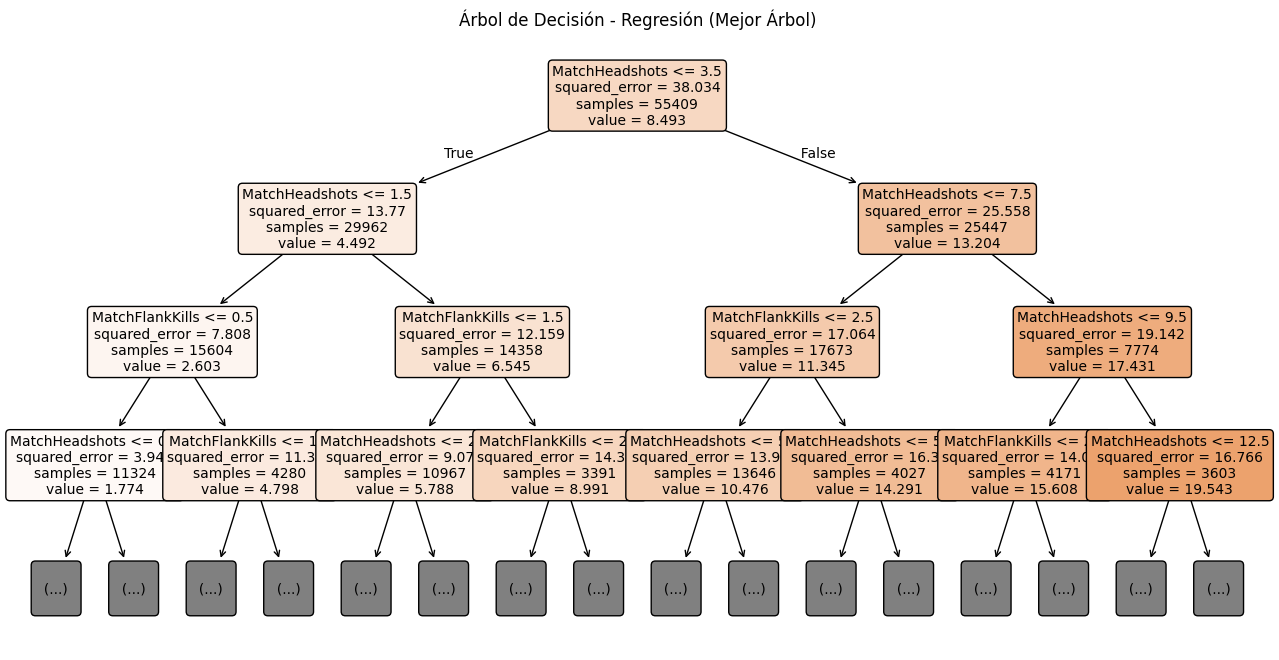

In [27]:
#Mejor arbol
plt.figure(figsize=(16, 8))
plot_tree(
    grid.best_estimator_,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title('Árbol de Decisión - Regresión (Mejor Árbol)')
plt.show()


Aqui se evaluaron diferentes modelos buscando la primera opcion y despues buscando la mejor opcion dentro de los modelos posibles, osea cual nos daria mejor resultado